In [3]:
import pandas as pd

# ---- STEP 1: Load your datasets ----
df_projects = pd.read_csv("/content/Project Management (1).csv")
df_forms = pd.read_csv("/content/Construction_Data_PM_Tasks_All_Projects.csv")
df_tasks = pd.read_csv("/content/Construction_Data_PM_Forms_All_Projects.csv")

# ---- STEP 2: Display basic information ----
print("==== DATASET 1: Project Management (1).csv ====")
print("Rows:", df_projects.shape[0])
print("Columns:", df_projects.shape[1])
print("\nColumn Names:", df_projects.columns.tolist())
print("\nMissing Values:\n", df_projects.isnull().sum())

print("\n\n==== DATASET 2: PM Forms All Projects ====")
print("Rows:", df_forms.shape[0])
print("Columns:", df_forms.shape[1])
print("\nColumn Names:", df_forms.columns.tolist())
print("\nMissing Values:\n", df_forms.isnull().sum())

print("\n\n==== DATASET 3: PM Tasks All Projects ====")
print("Rows:", df_tasks.shape[0])
print("Columns:", df_tasks.shape[1])
print("\nColumn Names:", df_tasks.columns.tolist())
print("\nMissing Values:\n", df_tasks.isnull().sum())


# ---- STEP 3: Show all columns so we can locate the delay label ----
print("\n\n==== ALL COLUMN NAMES ACROSS DATASETS ====")
print("Projects dataset:", df_projects.columns.tolist())
print("Forms dataset:", df_forms.columns.tolist())
print("Tasks dataset:", df_tasks.columns.tolist())


==== DATASET 1: Project Management (1).csv ====
Rows: 300
Columns: 16

Column Names: ['Project ID', 'Project Name', 'Project Type', 'Location', 'Start Date', 'End Date', 'Project Status', 'Priority', 'Task ID', 'Task Name', 'Task Status', 'Assigned To', 'Hours Spent', 'Budget', 'Actual Cost', 'Progress']

Missing Values:
 Project ID        0
Project Name      0
Project Type      0
Location          0
Start Date        0
End Date          0
Project Status    0
Priority          0
Task ID           0
Task Name         0
Task Status       0
Assigned To       0
Hours Spent       0
Budget            0
Actual Cost       0
Progress          0
dtype: int64


==== DATASET 2: PM Forms All Projects ====
Rows: 12424
Columns: 19

Column Names: ['Ref', 'Status', 'Location', 'Description', 'Created', 'Target', 'Type', 'To Package', 'Status Changed', 'Association', 'OverDue', 'Images', 'Comments', 'Documents', 'Priority', 'Cause', 'project', 'Report Status', 'Task Group']

Missing Values:
 Ref        

In [4]:
df_projects.head()


,Project ID,Project Name,Project Type,Location,Start Date,End Date,Project Status,Priority,Task ID,Task Name,Task Status,Assigned To,Hours Spent,Budget,Actual Cost,Progress
0,P001,Renovation of a School Project 001,Renovation,Texas,21/07/2024,08/08/2024,Behind,Medium,T001,Task 001 of Renovation of a School Project 001,In Progress,Bob,12,9621,0,0.24
1,P001,Renovation of a School Project 001,Renovation,New Jersey,21/07/2024,12/08/2024,Behind,High,T002,Task 002 of Renovation of a School Project 001,In Progress,Charlie,4,7814,0,0.56
2,P001,Renovation of a School Project 001,Renovation,Ohio,21/07/2024,10/08/2024,Behind,High,T003,Task 003 of Renovation of a School Project 001,Completed,Charlie,5,1028,1011,1.00
3,P002,Innovation of a Classroom Project 002,Innovation,Pennsylvania,04/06/2024,12/07/2025,On Track,High,T001,Task 001 of Innovation of a Classroom Project 002,Pending,Charlie,24,1530,0,0.33
4,P002,Innovation of a Classroom Project 002,Innovation,New York,04/06/2024,26/06/2025,On Track,Medium,T002,Task 002 of Innovation of a Classroom Project 002,Pending,Charlie,26,7201,0,0.32


In [5]:
import pandas as pd

# Load your projects dataset
df_projects = pd.read_csv("/content/Project Management (1).csv")

# Create delay label:
# 1 = delayed, 0 = on time
df_projects["Delay"] = df_projects["Project Status"].apply(
    lambda x: 1 if x.strip().lower() == "behind" else 0
)

# Check distribution
print("Class Distribution:")
print(df_projects["Delay"].value_counts())
print("\nPercentages:")
print(df_projects["Delay"].value_counts(normalize=True) * 100)

# Preview
df_projects.head()


Class Distribution:
Delay
0    213
1     87
Name: count, dtype: int64

Percentages:
Delay
0    71.0
1    29.0
Name: proportion, dtype: float64


,Project ID,Project Name,Project Type,Location,Start Date,End Date,Project Status,Priority,Task ID,Task Name,Task Status,Assigned To,Hours Spent,Budget,Actual Cost,Progress,Delay
0,P001,Renovation of a School Project 001,Renovation,Texas,21/07/2024,08/08/2024,Behind,Medium,T001,Task 001 of Renovation of a School Project 001,In Progress,Bob,12,9621,0,0.24,1
1,P001,Renovation of a School Project 001,Renovation,New Jersey,21/07/2024,12/08/2024,Behind,High,T002,Task 002 of Renovation of a School Project 001,In Progress,Charlie,4,7814,0,0.56,1
2,P001,Renovation of a School Project 001,Renovation,Ohio,21/07/2024,10/08/2024,Behind,High,T003,Task 003 of Renovation of a School Project 001,Completed,Charlie,5,1028,1011,1.00,1
3,P002,Innovation of a Classroom Project 002,Innovation,Pennsylvania,04/06/2024,12/07/2025,On Track,High,T001,Task 001 of Innovation of a Classroom Project 002,Pending,Charlie,24,1530,0,0.33,0
4,P002,Innovation of a Classroom Project 002,Innovation,New York,04/06/2024,26/06/2025,On Track,Medium,T002,Task 002 of Innovation of a Classroom Project 002,Pending,Charlie,26,7201,0,0.32,0


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# ---------------------------
# 1. Select the columns we want to use
# ---------------------------
model_df = df_projects[[
    "Progress",
    "Budget",
    "Actual Cost",
    "Hours Spent",
    "Project Status",
    "Priority",
    "Task Status",
    "Location",
    "Delay"
]]

# ---------------------------
# 2. One-hot encode categorical variables
# ---------------------------
model_df = pd.get_dummies(model_df, columns=[
    "Project Status",
    "Priority",
    "Task Status",
    "Location"
], drop_first=True)

# ---------------------------
# 3. Split into X and y
# ---------------------------
X = model_df.drop(columns=["Delay"])
y = model_df["Delay"]

# ---------------------------
# 4. Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 5. Scale numeric features
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 6. Train the model
# ---------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# ---------------------------
# 7. Predictions and metrics
# ---------------------------
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# baseline
baseline_acc = y_test.value_counts(normalize=True).max()

print("Training Accuracy:", round(train_acc, 3))
print("Test Accuracy:", round(test_acc, 3))
print("F1 Score:", round(f1, 3))
print("Baseline Accuracy:", round(baseline_acc, 3))


Training Accuracy: 1.0
Test Accuracy: 1.0
F1 Score: 1.0
Baseline Accuracy: 0.717


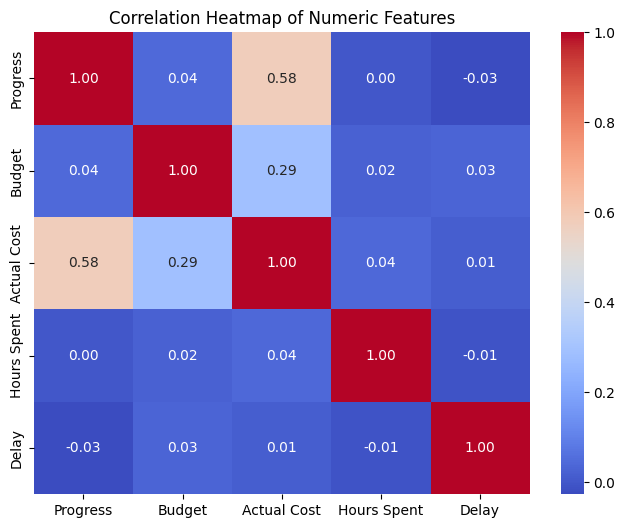

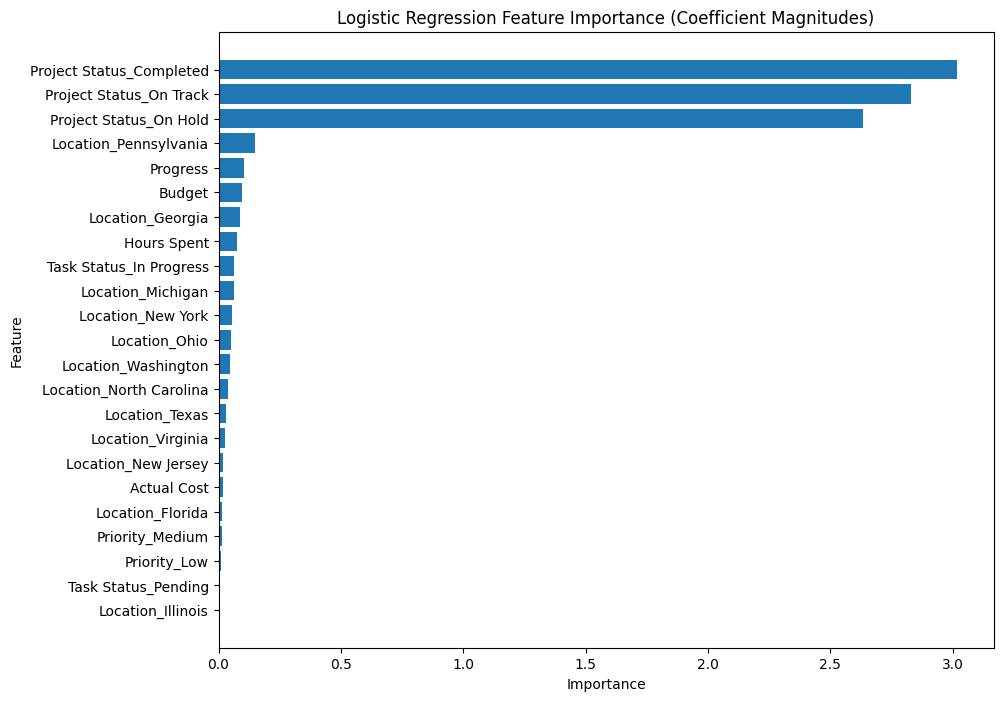

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Correlation Heatmap
# ---------------------------

numeric_cols = ["Progress", "Budget", "Actual Cost", "Hours Spent", "Delay"]
corr = df_projects[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# ---------------------------
# Feature Importance (Coefficient Magnitude)
# ---------------------------

# Get absolute value of coefficients
coefficients = np.abs(model.coef_[0])

# Get feature names
feature_names = X_train.columns

# Sort for readability
sorted_idx = np.argsort(coefficients)

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], coefficients[sorted_idx])
plt.title("Logistic Regression Feature Importance (Coefficient Magnitudes)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
